<a href="https://colab.research.google.com/github/Yeicko10/Supermarket_Sales/blob/main/Supermarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALIZAMOS EL COMPORTAMIENTO DE LAS VENTAS DE PRODUCTOS DE UN SUPERMERCADO**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime as dt

In [2]:
df = pd.read_csv("supermarket_sales.csv")

In [3]:
df

,Invoice ID,Date,Customer Type,Gender,Product Category,Unit Price,Quantity,Total Sales,Payment Method
0,INV0001,2024-03-10,Member,NaN,Snacks,24.72,3,323.78,Cash
1,INV0002,2024-03-04,Visitor,Female,Vegetables,44.27,7,354.98,Credit Card
2,INV0003,2024-03-11,Visitor,Female,Fruits,27.93,8,45.14,Credit Card
3,INV0004,2024-03-07,Visitor,Female,Fruits,39.68,1,52.96,Mobile Payment
4,INV0005,2024-03-17,Visitor,Male,Vegetables,38.59,10,95.29,Cash
...,...,...,...,...,...,...,...,...,...
145,INV0146,2024-03-02,Member,Female,Bakery,39.94,1,40.30,Credit Card
146,INV0147,2024-03-23,Visitor,Female,Beverages,8.85,10,288.78,Cash
147,INV0148,2024-03-02,Member,Female,Dairy,13.95,10,388.50,Mobile Payment
148,INV0149,2024-03-22,NaN,Female,Bakery,47.53,8,412.13,Cash


In [4]:
print(df.shape)

(150, 9)


In [5]:
df.describe()

,Unit Price,Quantity,Total Sales
count,150.000000,150.000000,150.000000
mean,28.756133,5.573333,278.499200
std,12.492023,2.791037,136.366231
min,5.280000,1.000000,25.950000
25%,18.960000,3.000000,173.612500
50%,28.865000,6.000000,297.695000
75%,39.655000,8.000000,390.115000
max,49.830000,10.000000,499.620000


In [6]:
print(df.columns)

Index(['Invoice ID', 'Date', 'Customer Type', 'Gender', 'Product Category',
       'Unit Price', 'Quantity', 'Total Sales', 'Payment Method'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Invoice ID        150 non-null    object 
 1   Date              150 non-null    object 
 2   Customer Type     142 non-null    object 
 3   Gender            135 non-null    object 
 4   Product Category  150 non-null    object 
 5   Unit Price        150 non-null    float64
 6   Quantity          150 non-null    int64  
 7   Total Sales       150 non-null    float64
 8   Payment Method    145 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 10.7+ KB


In [8]:
print(df.dtypes)

Invoice ID           object
Date                 object
Customer Type        object
Gender               object
Product Category     object
Unit Price          float64
Quantity              int64
Total Sales         float64
Payment Method       object
dtype: object


In [9]:
df = df.dropna()

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'])


1     2024-03-04
2     2024-03-11
3     2024-03-07
4     2024-03-17
5     2024-03-16
         ...    
144   2024-03-30
145   2024-03-02
146   2024-03-23
147   2024-03-02
149   2024-03-01
Name: Date, Length: 126, dtype: datetime64[ns]


<ipython-input-10-18b1c2f4a5f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:

df['Day_of_Week'] = df['Date'].dt.day_name()
print(df['Day_of_Week'])


1        Monday
2        Monday
3      Thursday
4        Sunday
5      Saturday
         ...   
144    Saturday
145    Saturday
146    Saturday
147    Saturday
149      Friday
Name: Day_of_Week, Length: 126, dtype: object


<ipython-input-11-f07a6a90b431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day_of_Week'] = df['Date'].dt.day_name()


In [12]:
df.head()

,Invoice ID,Date,Customer Type,Gender,Product Category,Unit Price,Quantity,Total Sales,Payment Method,Day_of_Week
1,INV0002,2024-03-04,Visitor,Female,Vegetables,44.27,7,354.98,Credit Card,Monday
2,INV0003,2024-03-11,Visitor,Female,Fruits,27.93,8,45.14,Credit Card,Monday
3,INV0004,2024-03-07,Visitor,Female,Fruits,39.68,1,52.96,Mobile Payment,Thursday
4,INV0005,2024-03-17,Visitor,Male,Vegetables,38.59,10,95.29,Cash,Sunday
5,INV0006,2024-03-16,Member,Male,Dairy,19.63,5,175.06,Credit Card,Saturday


In [13]:
print(df['Customer Type'].value_counts())
print(df['Payment Method'].value_counts())
print(df['Product Category'].value_counts())
print(df['Gender'].value_counts())


Customer Type
Member     66
Visitor    60
Name: count, dtype: int64
Payment Method
Cash              44
Mobile Payment    43
Credit Card       39
Name: count, dtype: int64
Product Category
Vegetables    29
Dairy         28
Snacks        20
Fruits        18
Bakery        16
Beverages     15
Name: count, dtype: int64
Gender
Female    65
Male      61
Name: count, dtype: int64


**Realizamos AED:** Primero identificamos las columnas que requieren una evaluación de los valores nulos, posteriormente reemplazamos esos valores nulos con los valores de la media aritmética. Luego, las variables categóricas son reemplazadas por numéricas a través del método one-hot-encoding. Por último, elegimos las vaiables características y la variable objetivo.

In [18]:
# Reemplazamos valures nulos por la moda de cada columna categórica
for column in ['Gender', 'Payment Method', 'Customer Type']:
  df[column] = df[column].fillna(df[column].mode()[0])

# Cambiamos las variables categóricas por numéricas usando one-hot encoding
categorical_cols = ['Gender', 'Payment Method', 'Product Category']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Inspeccionamos las columnas disponibles después del one-hot encoding
print(df_encoded.columns.tolist())

# Seleccionamos las características en base a las columnas disponibles
features = ['Gender_Male','Payment Method_Credit Card','Payment Method_Mobile Payment', 'Product Category_Beverages', 'Product Category_Fruits', 'Product Category_Snacks', 'Product Category_Vegetables']
target = 'Product Category_Dairy'

# Creamos el DataFrame preparado
df_prepared = df_encoded[features + [target]]
display(df_prepared.head())

['Invoice ID', 'Date', 'Customer Type', 'Unit Price', 'Quantity', 'Total Sales', 'Day_of_Week', 'Gender_Male', 'Payment Method_Credit Card', 'Payment Method_Mobile Payment', 'Product Category_Beverages', 'Product Category_Dairy', 'Product Category_Fruits', 'Product Category_Snacks', 'Product Category_Vegetables']


<ipython-input-18-2b8a54b1cc25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])


,Gender_Male,Payment Method_Credit Card,Payment Method_Mobile Payment,Product Category_Beverages,Product Category_Fruits,Product Category_Snacks,Product Category_Vegetables,Product Category_Dairy
1,False,True,False,False,False,False,True,False
2,False,True,False,False,True,False,False,False
3,False,False,True,False,True,False,False,False
4,True,False,False,False,False,False,True,False
5,True,True,False,False,False,False,False,True


**Separamos los datosv**

Ahora separamos los datos que se usarán para entrenamiento y para prueba

In [34]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en características (X) y objetivo (y)
X = df_prepared.drop('Product Category_Dairy', axis=1)
y = df_prepared['Product Category_Dairy']

# Dividimos los datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Entrenamiento del modelo**

Entrenamos el modelo utilizando el algoritmo *DecissionTreeClassifier*

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Inicializamos el clasificador de árbol de decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenamos el modelo
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

**Evaluación del modelo**

Ahora evaluamos el modelo almacenado en la variable dt_model, observaremos los resultados a través de las métricas obtenidas a través de una matriz de confusión

Accuracy: 0.8157894736842105
Precision: 0.8333333333333334
Recall: 0.45454545454545453
F1 Score: 0.5882352941176471


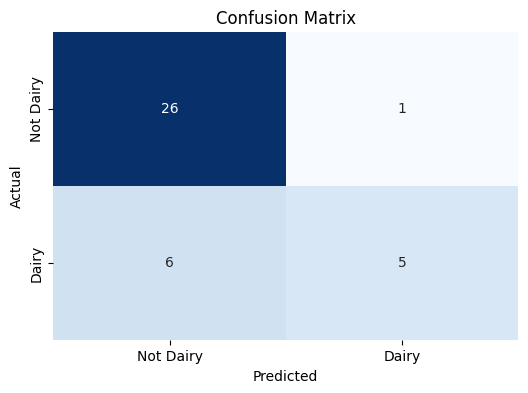

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hacemos predicciones usando el conjunto de prueba
y_pred = dt_model.predict(X_test)

# Calculamos la evaluación de las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Creamos la matriz de confusión

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False,
            xticklabels=['Not Dairy', 'Dairy'],yticklabels=['Not Dairy', 'Dairy'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Mejora de los hiperparámetros**

Ajustamos los hiperparámetros para optimizar el modelo de árbol de decisión

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.8947368421052632
Precision: 0.8888888888888888
Recall: 0.7272727272727273
F1-score: 0.8


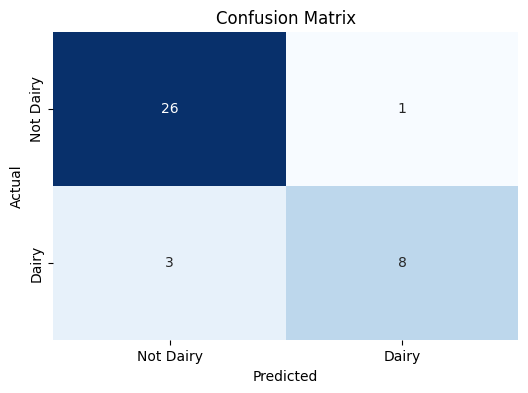

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definimos los parámetros de la malla
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Creamos un clasificador de árbol de decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Configuramos el  GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros y el mejor estimador
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluamos el mejor modelo
y_pred = best_dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Dairy', 'Dairy'], yticklabels=['Not Dairy', 'Dairy'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Creamos la visualización del árbol de decisión**

En la figura podemos observar cada uno de los nodos y ramas que constituyen el árbol de decisión

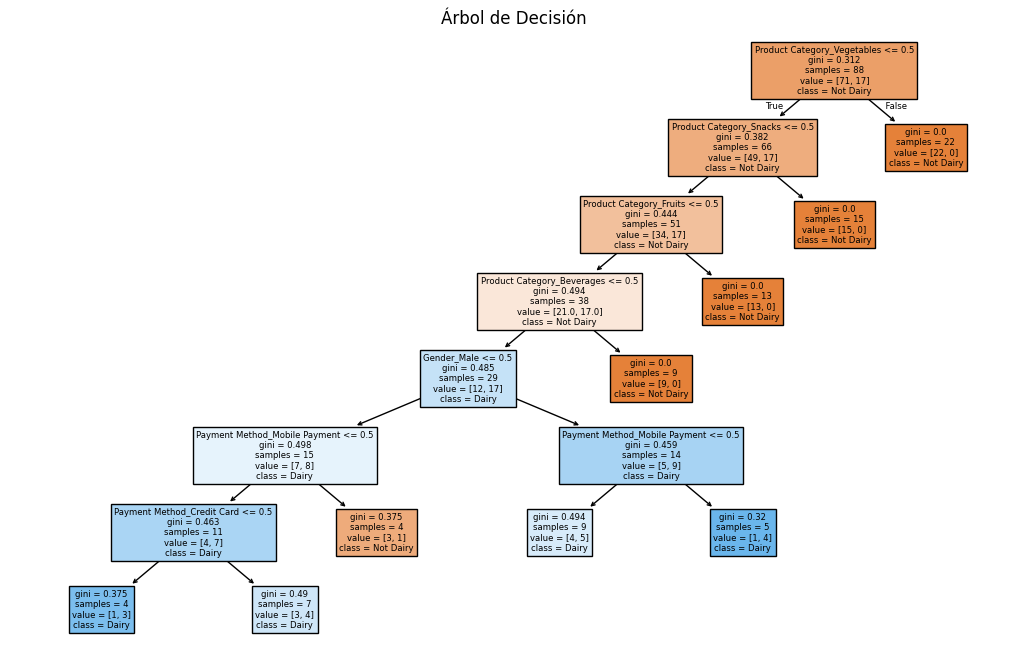

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(13, 8))  # Ajusta el tamaño de la figura si es necesario
plot_tree(best_dt_model, feature_names=X.columns, class_names=['Not Dairy', 'Dairy'], filled=True)
plt.title('Árbol de Decisión')
plt.savefig('decision_tree_supermarket.jpg')
plt.show()